In [3]:
import gzip
import numpy as np
import pickle
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

In [4]:
path = 'flatland_train.data' 
X, y = pickle.load(gzip.open(path, 'rb'))
y[y != 0] -= 2 
X = X / 255. 

In [5]:
X.shape

(10000, 50, 50)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
X_train.shape

(7500, 50, 50)

In [8]:
X_test.shape

(2500, 50, 50)

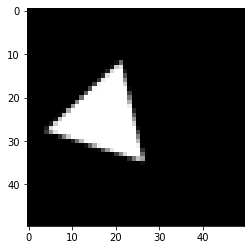

In [9]:
plt.imshow(X_test[0],cmap='gray')

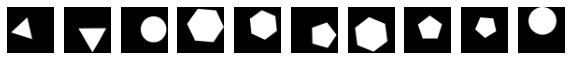

In [10]:
plt.figure(figsize=(10, 10))
for i in range(10):
        plt.subplot(10, 10, 10 + i + 1)
        plt.imshow(X_test[i], cmap='gray')
        plt.axis('off')
plt.show()

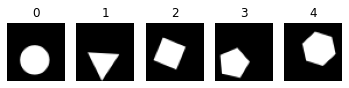

In [11]:
for i in range(5):
    idx= np.where(y_train == i)[0][0]
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[idx],cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show()

### DNN

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (50, 50)))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(5, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', 
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2500)              0         
                                                                 
 dense (Dense)               (None, 20)                50020     
                                                                 
 dense_1 (Dense)             (None, 5)                 105       
                                                                 
Total params: 50,125
Trainable params: 50,125
Non-trainable params: 0
_________________________________________________________________


In [13]:
loss = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
235/235 [==============================] - 3s 5ms/step - loss: 1.5153 - accuracy: 0.3661 - val_loss: 1.4558 - val_accuracy: 0.3936
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 1.3737 - accuracy: 0.4372 - val_loss: 1.3631 - val_accuracy: 0.4448
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 1.2824 - accuracy: 0.4811 - val_loss: 1.3014 - val_accuracy: 0.4680
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 1.2274 - accuracy: 0.4963 - val_loss: 1.2719 - val_accuracy: 0.4812
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 1.1888 - accuracy: 0.5095 - val_loss: 1.2236 - val_accuracy: 0.4948
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 1.1560 - accuracy: 0.5205 - val_loss: 1.2071 - val_accuracy: 0.4900
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 1.1349 - accuracy: 0.5341 - val_loss: 1.1875 - val_accuracy: 0.5028
Epoch 

In [14]:
pd.DataFrame(loss.history)

,loss,accuracy,val_loss,val_accuracy
0,1.515263,0.366133,1.455755,0.3936
1,1.373742,0.437200,1.363108,0.4448
2,1.282431,0.481067,1.301429,0.4680
3,1.227448,0.496267,1.271929,0.4812
4,1.188824,0.509467,1.223556,0.4948
5,1.155984,0.520533,1.207063,0.4900
6,1.134872,0.534133,1.187473,0.5028
7,1.111006,0.537867,1.186616,0.4996
8,1.091865,0.545067,1.164816,0.5060
9,1.069774,0.558933,1.142092,0.5180


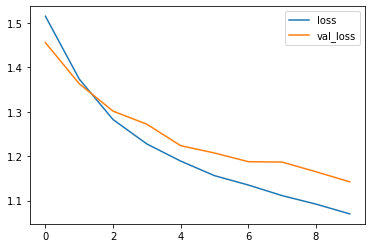

In [15]:
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot()

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (50, 50)))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(16, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer =  keras.optimizers.SGD(learning_rate = 0.01), 
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2500)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               320128    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
Total params: 329,424
Trainable params: 329,424
Non-trainable params: 0
_________________________________________________________________


In [17]:
loss = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 1.6504 - accuracy: 0.3813 - val_loss: 1.3804 - val_accuracy: 0.4516
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 1.2900 - accuracy: 0.4740 - val_loss: 1.3897 - val_accuracy: 0.3812
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 1.2055 - accuracy: 0.5020 - val_loss: 1.2768 - val_accuracy: 0.4964
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 1.1517 - accuracy: 0.5267 - val_loss: 1.1572 - val_accuracy: 0.4980
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 1.1036 - accuracy: 0.5409 - val_loss: 1.2658 - val_accuracy: 0.4748
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 1.0625 - accuracy: 0.5565 - val_loss: 1.1101 - val_accuracy: 0.5456
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 1.0200 - accuracy: 0.5839 - val_loss: 1.0788 - val_accuracy: 0.5428
Epoch 

In [18]:
pd.DataFrame(loss.history)

,loss,accuracy,val_loss,val_accuracy
0,1.650381,0.381333,1.380356,0.4516
1,1.290020,0.474000,1.389743,0.3812
2,1.205491,0.502000,1.276752,0.4964
3,1.151677,0.526667,1.157235,0.4980
4,1.103584,0.540933,1.265772,0.4748
5,1.062517,0.556533,1.110122,0.5456
6,1.020049,0.583867,1.078837,0.5428
7,0.984369,0.598933,1.212582,0.4908
8,0.940074,0.622667,1.033838,0.5620
9,0.903140,0.639200,0.980207,0.5856


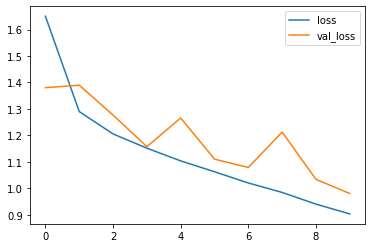

In [19]:
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot()

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (50, 50)))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(16, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer =  keras.optimizers.Adam(learning_rate = 3e-4), 
              metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2500)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               320128    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 16)                1040      
                                                                 
Total params: 329,424
Trainable params: 329,424
Non-trainable params: 0
_________________________________________________________________


In [21]:
loss = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 1.4363 - accuracy: 0.4239 - val_loss: 1.2828 - val_accuracy: 0.4936
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 1.1517 - accuracy: 0.5232 - val_loss: 1.1265 - val_accuracy: 0.5252
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 1.0256 - accuracy: 0.5804 - val_loss: 1.0527 - val_accuracy: 0.5860
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.9099 - accuracy: 0.6320 - val_loss: 0.9614 - val_accuracy: 0.6132
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.8190 - accuracy: 0.6771 - val_loss: 0.8861 - val_accuracy: 0.6100
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.7416 - accuracy: 0.7080 - val_loss: 0.8165 - val_accuracy: 0.6496
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6740 - accuracy: 0.7399 - val_loss: 0.8188 - val_accuracy: 0.6616
Epoch 

In [22]:
pd.DataFrame(loss.history)

,loss,accuracy,val_loss,val_accuracy
0,1.436339,0.423867,1.282811,0.4936
1,1.151722,0.523200,1.126479,0.5252
2,1.025610,0.580400,1.052737,0.5860
3,0.909854,0.632000,0.961356,0.6132
4,0.818997,0.677067,0.886148,0.6100
5,0.741575,0.708000,0.816470,0.6496
6,0.673980,0.739867,0.818762,0.6616
7,0.633440,0.750400,0.754087,0.7060
8,0.581102,0.778933,0.751491,0.7036
9,0.550256,0.795467,0.705722,0.7096


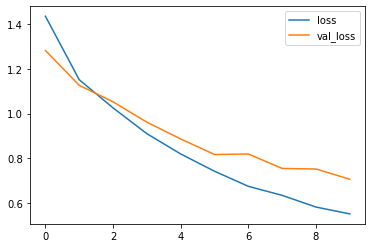

In [23]:
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot()

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (50, 50)))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(16, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer =  keras.optimizers.Adam(learning_rate = 3e-4), 
              metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2500)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               320128    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
Total params: 329,424
Trainable params: 329,424
Non-tr

In [25]:
loss = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 1.5913 - accuracy: 0.3767 - val_loss: 1.2559 - val_accuracy: 0.5020
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 1.2420 - accuracy: 0.4912 - val_loss: 1.1623 - val_accuracy: 0.5244
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 1.1180 - accuracy: 0.5444 - val_loss: 1.0708 - val_accuracy: 0.5544
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.9950 - accuracy: 0.5956 - val_loss: 0.9874 - val_accuracy: 0.6064
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.9054 - accuracy: 0.6328 - val_loss: 0.9020 - val_accuracy: 0.6252
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.8256 - accuracy: 0.6695 - val_loss: 0.8165 - val_accuracy: 0.6772
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.7649 - accuracy: 0.6956 - val_loss: 0.7749 - val_accuracy: 0.6948
Epoch 

In [26]:
pd.DataFrame(loss.history)

,loss,accuracy,val_loss,val_accuracy
0,1.591260,0.376667,1.255890,0.5020
1,1.242046,0.491200,1.162286,0.5244
2,1.118009,0.544400,1.070824,0.5544
3,0.994973,0.595600,0.987439,0.6064
4,0.905419,0.632800,0.902001,0.6252
5,0.825608,0.669467,0.816490,0.6772
6,0.764948,0.695600,0.774856,0.6948
7,0.717496,0.711067,0.772211,0.6880
8,0.679828,0.725600,0.708395,0.7152
9,0.634455,0.753067,0.707365,0.7148


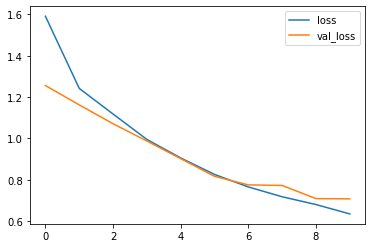

In [27]:
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot()

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1])) 
model.add(keras.layers.BatchNormalization(axis=-1)) 
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                      

In [39]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
235/235 [==============================] - 4s 11ms/step - loss: 1.0199 - accuracy: 0.6052 - val_loss: 5.9997 - val_accuracy: 0.2428
Epoch 2/20
235/235 [==============================] - 2s 10ms/step - loss: 0.3475 - accuracy: 0.8929 - val_loss: 11.1096 - val_accuracy: 0.1520
Epoch 3/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1865 - accuracy: 0.9537 - val_loss: 2.1143 - val_accuracy: 0.3840
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1100 - accuracy: 0.9723 - val_loss: 0.2193 - val_accuracy: 0.9540
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0759 - accuracy: 0.9801 - val_loss: 0.2086 - val_accuracy: 0.9608
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0495 - accuracy: 0.9873 - val_loss: 0.2472 - val_accuracy: 0.9520
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0376 - accuracy: 0.9901 - val_loss: 0.2125 - val_accuracy: 0.966

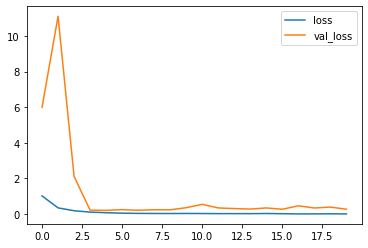

In [40]:
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot()

In [43]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1])) 
model.add(keras.layers.BatchNormalization(axis=-1)) 
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_14 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                     

In [44]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
235/235 [==============================] - 3s 11ms/step - loss: 1.0634 - accuracy: 0.5911 - val_loss: 3.9753 - val_accuracy: 0.2344
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 0.4002 - accuracy: 0.8699 - val_loss: 6.8057 - val_accuracy: 0.2500
Epoch 3/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1847 - accuracy: 0.9548 - val_loss: 1.6246 - val_accuracy: 0.4824
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1083 - accuracy: 0.9743 - val_loss: 0.2526 - val_accuracy: 0.9324
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0737 - accuracy: 0.9808 - val_loss: 0.2344 - val_accuracy: 0.9524
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0566 - accuracy: 0.9839 - val_loss: 0.2643 - val_accuracy: 0.9392
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.4075 - val_accuracy: 0.8976

In [47]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1])) 
model.add(keras.layers.BatchNormalization(axis=-1)) 
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_18 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                     

In [50]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0313 - accuracy: 0.9918 - val_loss: 0.4327 - val_accuracy: 0.9580
Epoch 2/10
188/188 [==============================] - 2s 11ms/step - loss: 0.0234 - accuracy: 0.9928 - val_loss: 0.4919 - val_accuracy: 0.9067
Epoch 3/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0382 - accuracy: 0.9895 - val_loss: 0.6200 - val_accuracy: 0.8920
Epoch 4/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0300 - accuracy: 0.9892 - val_loss: 0.5142 - val_accuracy: 0.9400
Epoch 5/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0122 - accuracy: 0.9973 - val_loss: 0.4160 - val_accuracy: 0.9627
Epoch 6/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.4970 - val_accuracy: 0.9687
Epoch 7/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.4632 - val_accuracy: 0.9713

In [51]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1])) 
model.add(keras.layers.BatchNormalization(axis=-1)) 
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_20 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                     

In [53]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0250 - accuracy: 0.9933 - val_loss: 0.3228 - val_accuracy: 0.9507
Epoch 2/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.3694 - val_accuracy: 0.9653
Epoch 3/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0130 - accuracy: 0.9962 - val_loss: 0.3811 - val_accuracy: 0.9520
Epoch 4/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0124 - accuracy: 0.9973 - val_loss: 0.3594 - val_accuracy: 0.9587
Epoch 5/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.4664 - val_accuracy: 0.9333
Epoch 6/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0434 - accuracy: 0.9863 - val_loss: 1.5777 - val_accuracy: 0.7593
Epoch 7/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0908 - accuracy: 0.9705 - val_loss: 6.0051 - val_accuracy: 0.5460


In [56]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1])) 
model.add(keras.layers.BatchNormalization(axis=-1)) 
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_24 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                     

In [57]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
235/235 [==============================] - 4s 13ms/step - loss: 1.2292 - accuracy: 0.5191 - val_loss: 2.6317 - val_accuracy: 0.2408
Epoch 2/20
235/235 [==============================] - 2s 10ms/step - loss: 0.5317 - accuracy: 0.8073 - val_loss: 4.6582 - val_accuracy: 0.1516
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2929 - accuracy: 0.9179 - val_loss: 1.6040 - val_accuracy: 0.4016
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1943 - accuracy: 0.9479 - val_loss: 0.3725 - val_accuracy: 0.8952
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1298 - accuracy: 0.9659 - val_loss: 0.5089 - val_accuracy: 0.8572
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0926 - accuracy: 0.9755 - val_loss: 0.2601 - val_accuracy: 0.9500
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0705 - accuracy: 0.9800 - val_loss: 0.2582 - val_accuracy: 0.9536

In [58]:
pred = model.predict(X_test).argmax(axis=1)

print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 96.44%


In [62]:
model.save('model5.h5')